# Advanced Linear Regression Analysis Assignment


#### Objective:
Refine your understanding of linear regression, including its evaluation and optimization, through hands-on practice with the Boston Housing dataset. This assignment encompasses data loading, cleaning, exploration, implementing linear regression, and evaluating the model using various metrics.



#### Dataset: Boston Housing Dataset
This dataset can be loaded from the `sklearn.datasets` module. It includes data on various aspects of housing in the Boston Massachusetts area.


#### Part 1: Data Preparation and Exploration

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
df=pd.DataFrame(data)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df=df.rename(columns={0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',5:'RM',6:'AGE',7:'DIS',8:'RAD',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT',13:'MEDV'})

In [6]:
df  #In the below data frame the last column name MEDV is not comming so i am going to download the dataset from kaggle

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**1. Data Loading**: Load the Boston Housing dataset using `sklearn.datasets.load_boston()`.

# Import Library

In [2]:
#In the below data frame the last column name MEDV is not comming so i am going to download the dataset from kaggle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\Excel_Csv_file\BostonHousing.csv")

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**2. Data Cleaning**: Check for and handle any missing or null values.

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

**3. Data Exploration**: Provide a statistical summary of the dataset's features and visualize the distribution of key features.

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

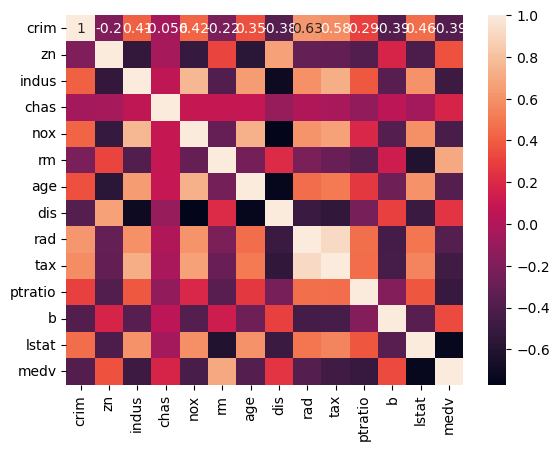

In [7]:
sns.heatmap(df.corr(),annot=True) # HEATMAP

#### Part 2: Linear Regression Implementation and Evaluation

# Split Dataset

In [8]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)


In [9]:
M_train_input=train_df[['rad','tax','lstat']]
M_train_output=train_df[['medv']]
M_test_input=test_df[['rad','tax','lstat']]
M_test_output=test_df[['medv']]


In [10]:
from sklearn.linear_model import LinearRegression
mult_model=LinearRegression()
mult_model

LinearRegression()

In [11]:
mult_model.fit(M_train_input,M_train_output)

LinearRegression()

In [12]:
M_train_pred=mult_model.predict(M_train_input)
M_test_pred=mult_model.predict(M_test_input)

**1. Linear Regression Model**: Implement a linear regression model predicting the median value of homes.

In [19]:
M_train_input.head(1)


,rad,tax,lstat
477,24,666,24.91


In [20]:
M_train_output.head(1)

,medv
477,12.0


# Predicted Value

In [22]:
predicted_output=mult_model.predict(M_train_input.head(1))
predicted_output

array([[10.6255765]])

**2. Evaluation Metrics**: Evaluate your model using MAE, MSE, RMSE, and R-squared metrics.

# Evaluation Metric

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
train_mae = mean_absolute_error(M_train_output, M_train_pred)
train_mse = mean_squared_error(M_train_output, M_train_pred,squared=False)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(M_train_output, M_train_pred)

test_mae = mean_absolute_error(M_test_output, M_test_pred)
test_mse = mean_squared_error(M_test_output, M_test_pred,squared=False)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(M_test_output, M_test_pred)


# # Compare the RMSE and R2 score between train and test Data

In [28]:
print(f"test MAE: {test_mae}")
print(f"test MSE: {test_mse}")
print(f"test RMSE: {test_rmse}")
print(f"test R-squared: {test_r2}")

test MAE: 3.8961659321566056
test MSE: 5.580892035026715
test RMSE: 2.362391168927516
test R-squared: 0.5752795701466513


In [29]:
print(f"train MAE: {train_mae}")
print(f"train MSE: {train_mse}")
print(f"train RMSE: {train_rmse}")
print(f"train R-squared: {train_r2}")

train MAE: 4.527943711714125
train MSE: 6.223712567115855
train RMSE: 2.4947369735336538
train R-squared: 0.5541259302725641



#### Submission Guidelines:
- Document every step of your process, from data preparation to model evaluation.
- Ensure your code is well-commented to clarify the purpose behind each operation.
- Submit your completed assignment as a Jupyter Notebook (.ipynb).



#### Assessment Criteria:
- Completeness and accuracy of data preparation and exploratory analysis.
- Proper implementation and evaluation of the linear regression model.
- Clarity and organization of the submitted notebook.
